# **Visualization with Seaborn**

**Visualization answers questions like:**

* Which variables move together?

* How do groups differ?

* What is the shape of the distribution?

* Who are the outliers?

* What patterns should we model?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Titanic-Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **1. Definition & Purpose**
Seaborn is a Python data-visualization library built on top of Matplotlib that makes it easy to create beautiful, informative statistical graphics with minimal code.

**Think of it this way:**

* Matplotlib = low-level painting tool (you control every brush stroke)
* Seaborn = high-level visualization library (you describe what you want, it handles the details)

#**2. Why Seaborn Exists: The Problem It Solves**

**The Matplotlib Problem**

Matplotlib is powerful but very low-level.
That means you often have to manually control many small details just to create a simple, decent-looking plot.

A basic Matplotlib plot can feel long and repetitive.

**Let’s plot age vs fare in Matplotlib:**

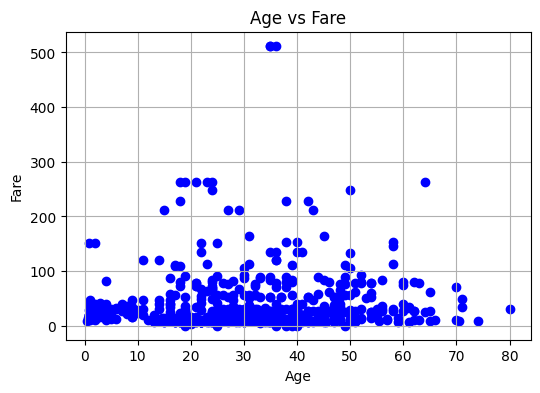

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["Age"], df["Fare"], color="blue")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()


**We had to:**

* create the figure

* choose size

* add grid

* pick colors

* label axes

* set title

* call show()

* handle styling manually

And the default style isn’t very pretty.

**Why Seaborn Was Created**

Seaborn was designed to fix these problems by:

1. Reducing Code

A plot that takes 8–10 lines in Matplotlib can take 1–2 lines in Seaborn.

2. Cleaner Defaults

**Seaborn automatically:**

* applies beautiful themes

* sets good color palettes

* adds grids

* handles figure sizes better

integrates with DataFrames naturally

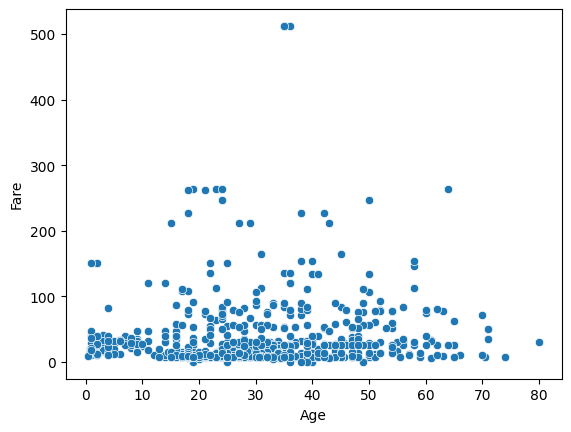

In [ ]:
sns.scatterplot(data=df, x="Age", y="Fare")
plt.show()

**No need to:**

* pick colors

* create figure

* style plot

Seaborn handles styling, grids, labels, and colors automatically.

# **Architecture: How Seaborn Sits on Top of Matplotlib**

**Seaborn doesn't replace Matplotlib; it simplifies it.**

Seaborn handles the thinking

* "I want to visualize this relationship" → Seaborn picks the right approach
* "I want to group by category" → Seaborn automatically manages colors, legends


Matplotlib handles the display

* Creating figures and axes
* Rendering to screen or file
* Low-level customization


You still use Matplotlib commands

* Add titles: plt.title()
* Save figures: plt.savefig()
* Show plots: plt.show()
* Adjust layout: plt.tight_layout()

# **Integrating with Matplotlib**

Seaborn is built on top of Matplotlib, which means every plot you create with Seaborn can be further customized using Matplotlib functions.

**This is powerful because:**

**Granular Control:**
* While Seaborn makes creating attractive plots simple, Matplotlib lets you adjust titles, labels, axis scales, legends, figure size, grids, and more.

**Combining Strengths:**
* You can use Seaborn for its high-level plotting and statistical visuals, then enhance it with Matplotlib to tailor the plot for presentations, reports, or publications.

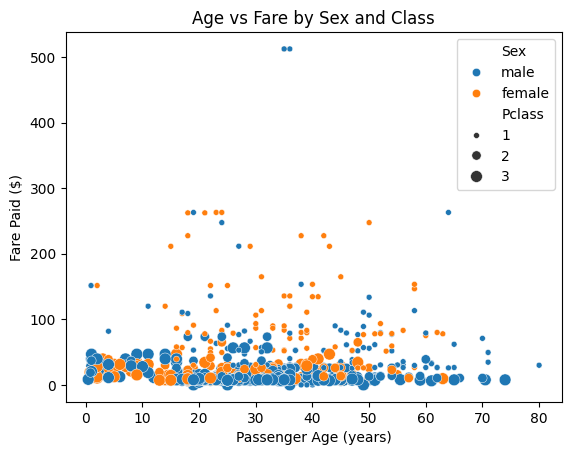

In [ ]:
#Create Seaborn plot
sns.scatterplot(data=df, x='Age', y='Fare', hue='Sex', size='Pclass')

#Add Matplotlib customizations
plt.title('Age vs Fare by Sex and Class')
plt.xlabel('Passenger Age (years)')
plt.ylabel('Fare Paid ($)')

#Display with Matplotlib
plt.show()


we plot Age vs Fare and color the points by Sex, size them by Passenger Class using Seaborn.

**Then, using Matplotlib, you add:**

* descriptive title

* labeled axes

* customized figure dimensions

**Outcome:**
You get a polished, professional visualization that communicates your story clearly while still taking advantage of Seaborn’s simplicity.

# **Advanced Visualization**
Seaborn is not just for simple plots it is designed to handle complex, multivariate, and statistical visualizations with minimal effort. Here’s what makes it advanced:

### **3.1 Distribution Plots**

Distribution plots help us understand the spread and shape of a single variable (univariate distribution) or the relationship between two variables (bivariate distribution).

#### **Histograms**

A histogram shows the distribution of a numerical variable by dividing the data into bins and counting the number of observations in each bin. Seaborn's `histplot` provides enhanced features over Matplotlib's `hist`.

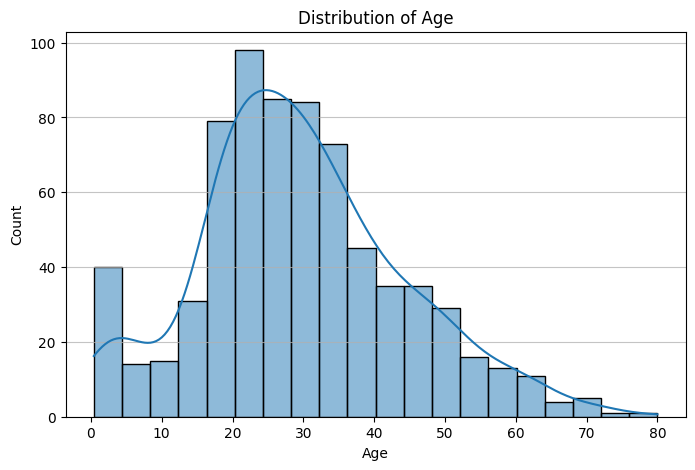

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", kde=True, bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.75)
plt.show()

#### **Kernel Density Estimate (KDE) Plots**

KDE plots are a way to visualize the probability density function of a continuous variable. They are smoother than histograms and can be very useful for illustrating the shape of a distribution without being tied to specific bin sizes.

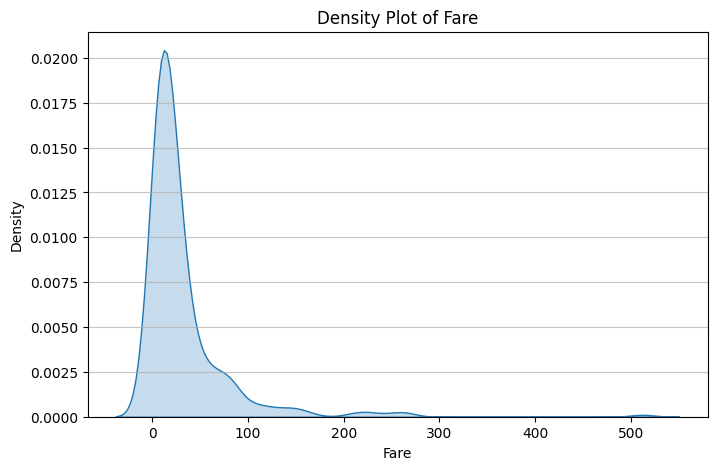

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Fare", fill=True)
plt.title("Density Plot of Fare")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.75)
plt.show()

#### **Pair Plots**

When you want to visualize the relationships between multiple pairs of variables in a dataset, especially numerical ones, `sns.pairplot` is incredibly useful. It creates a grid of scatterplots for each pair of variables, and histograms/KDE plots for univariate distributions on the diagonal.

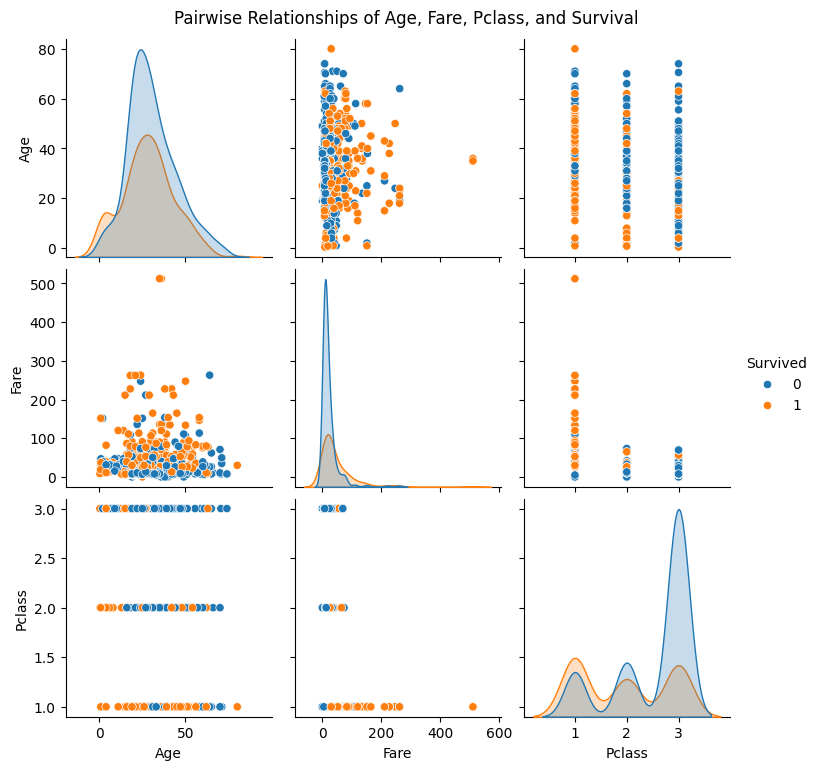

In [ ]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde')
plt.suptitle("Pairwise Relationships of Age, Fare, Pclass, and Survival", y=1.02) # Adjust suptitle position
plt.show()

### **3.4 Regression Plots**

Regression plots in Seaborn are used to visualize linear relationships between two variables, often with a regression line and confidence interval. `sns.lmplot` and `sns.regplot` are the primary functions for this.

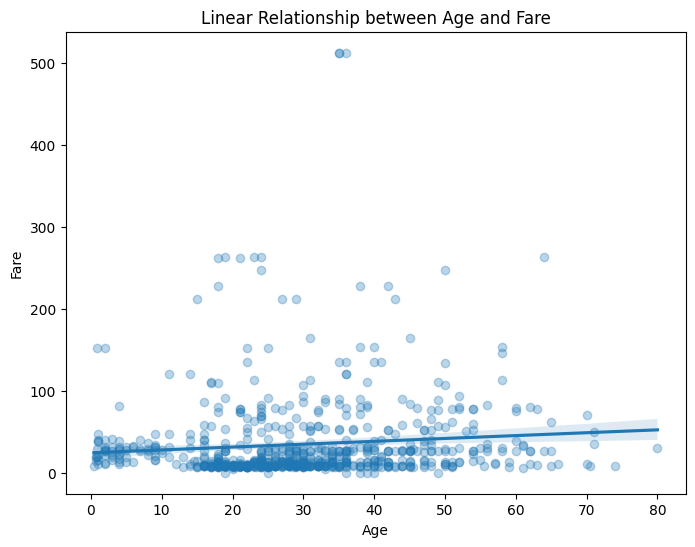

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="Age", y="Fare", scatter_kws={'alpha':0.3})
plt.title("Linear Relationship between Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### **3.2 Categorical Plots**

Categorical plots are designed to visualize the relationship between a numerical variable and one or more categorical variables. They are essential for comparing distributions or statistics across different groups.

#### **Box Plots**

Box plots (or box-and-whisker plots) are excellent for showing the distribution of a quantitative variable across different categories. They display the median, quartiles, and potential outliers.

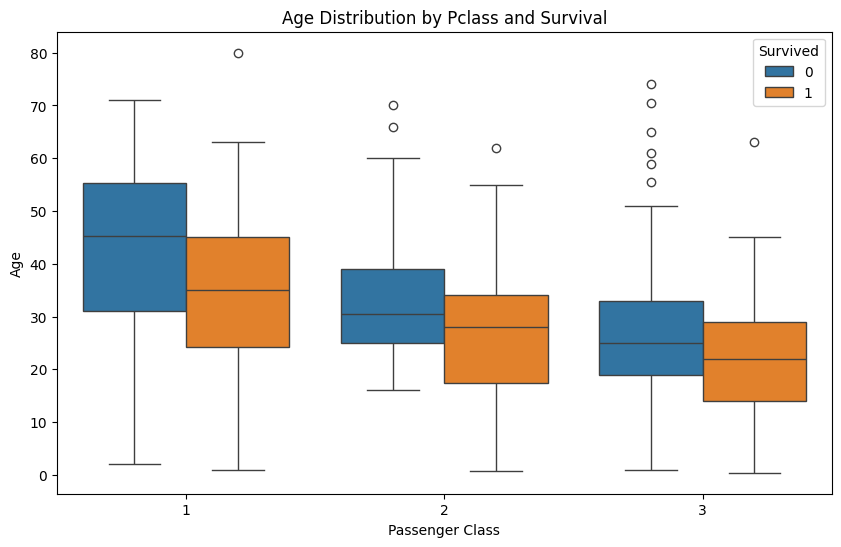

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived")
plt.title("Age Distribution by Pclass and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

#### **Violin Plots**

Violin plots (`sns.violinplot`) are similar to box plots but also show the probability density of the data at different values, often smoothed by a kernel density estimator. They provide a richer description of the data distribution.

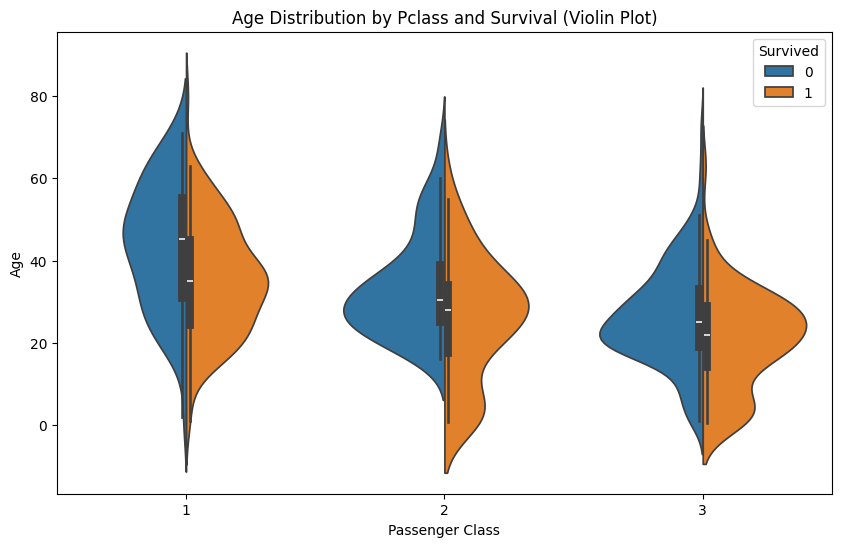

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived", split=True)
plt.title("Age Distribution by Pclass and Survival (Violin Plot)")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

#### **Count Plots**

A count plot (`sns.countplot`) shows the counts of observations in each category using bars. It's essentially a histogram across a categorical variable, very useful for visualizing the frequency of categories.

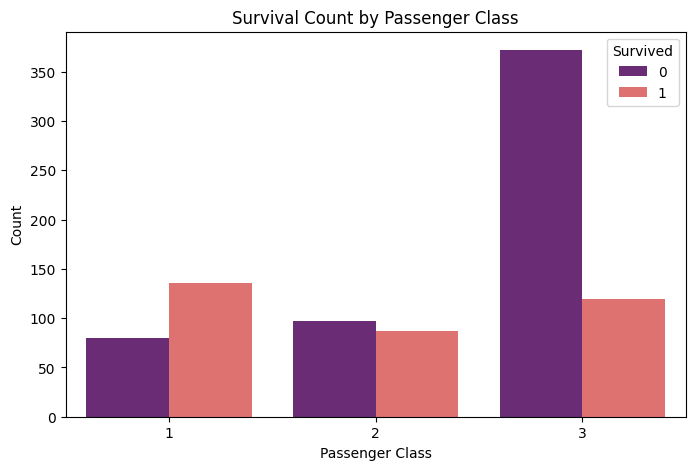

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="magma")
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# **Correlation & Covariance**

**Understanding Relationships Between Variables**

Both Covariance and Correlation are fundamental statistical measures used to quantify relationships between two variables. They help answer questions like:

* Do these variables move together?

* How strong is their relationship?

* Can one variable help predict another?

**The Idea**

Imagine two students' test scores over 4 exams:
* Student A (consistent): 70, 72, 71, 70 (small variation)
* Student B (all over the place): 50, 90, 60, 80 (large variation)

Question: If we look at A and B scores together, do they move together?

**Intuition:**

* If Student A scores high, does Student B tend to score high?
* If Student A scores low, does Student B tend to score low?


##**1. Covariance**

**What it tells us:**

Covariance provides a raw measure of how two variables change together.

**Interpretation:**

* **Positive covariance (Cov(X, Y) > 0):** both variables tend to increase or decrease at the same time.

* **Negative covariance (Cov(X, Y) < 0):** as one variable increases, the other tends to decrease.

* **Near zero (Cov(X, Y) ≈ 0):** little to no linear relationship.


**Crucial Limitation of Covariance**

* Covariance is scale-dependent.

* Changing the units of a variable (e.g., meters → centimeters or dollars → cents) changes the covariance value.

* This makes it hard to compare relationships between different variable pairs or datasets.


Covariance tells direction but not standardized strength.

This limitation is why correlation is preferred: it standardizes covariance to a scale from -1 to +1, making comparisons easy and meaningful.

## **Calculate Covariance**

To calculate the covariance matrix, the first step is to isolate the numerical features in df, since covariance can only be computed on numeric values. After selecting these columns, apply df.cov() to compute the covariance matrix and then display it.

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


##**Correlation — The Normalized Relationship**

Covariance tells us whether two variables move together or in opposite directions, but it has a major weakness:
its magnitude depends on the scale and units of the variables. Because of this, covariance is hard to compare across variable pairs.

**Correlation solves this problem.**

Correlation is a standardized measure that describes both the strength and direction of a linear relationship between two quantitative variables. Correlation values always fall between –1 and +1, making them easy and universal to interpret.

**Correlation as Normalized Covariance**

Correlation is essentially covariance that has been standardized.

It takes the covariance value and divides it by the product of the standard deviations of the two variables.
This removes the influence of units (e.g., dollars vs cents) and variable scale.

Why Normalize?

1. Comparability
A covariance of 100 might be large in one dataset but small in another.
A correlation of 0.8, however, always represents a strong positive relationship — no matter the dataset.

2. Unit-free
Covariance changes if units change (e.g., fare in dollars vs cents).
Correlation never changes because it has no units at all.

## **Calculate Correlation**

To compute the correlation matrix, use only the numerical columns from df, since correlation calculations require numeric data. After selecting the numerical subset (stored in numerical_df), apply **.corr()** to generate the correlation matrix and print it.


In [ ]:
correlation_matrix = numerical_df.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


##**Visualizing the Correlation Matrix with a Heatmap**

Once the correlation matrix has been calculated, the next step is to visualize it so patterns become easier to understand. A table of numbers can be overwhelming, but a heatmap turns those numbers into color patterns that reveal relationships at a glance.

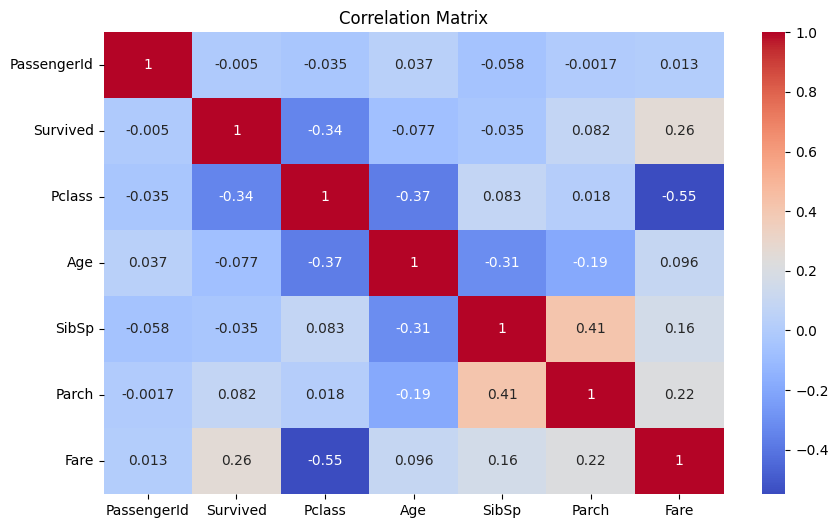

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

**What the Heatmap Shows**

A Seaborn heatmap uses colors to represent the strength and direction of correlations:

* Dark or intense colors → stronger relationships (either strongly positive or strongly negative)

* Light or faded colors → weak or near-zero relationships

* Diagonal values → always 1, because each variable is perfectly correlated with itself

# **Correlation Does NOT Mean Causation**

Correlation simply tells you how strongly two variables move together.
It does not tell you why they move together, and it does not prove that one variable is responsible for the other.

A high correlation might tempt you to conclude:

* “A causes B”

* “Changing X will automatically change Y”


Even if two variables have a strong relationship, you must always ask:

**“Why might these move together?”**

before thinking “X causes Y.”

There could be:

* A third hidden factor causing both

* A coincidence

* A non-causal relationship


# **Additional Resources**

[Seaborn Tutorial (Data Visualization)](https://www.youtube.com/watch?v=39cge_JhVjI)

[Correlation in Python and Create a Correlation Matrix in Seaborn](https://www.youtube.com/watch?v=f8NlU2xKs48)

[What is COVARIANCE? What is CORRELATION?](https://www.youtube.com/watch?v=mG__Wpp9dns)